# 1 As seen in the chart (In [42]), the demand cycle appears to be increasing, with the highest usage numbers in March and April.

In [24]:
import json
import pandas as pd

In [25]:
json_data=open('/Users/ryanpurcell/Desktop/ultimate_challenge/logins.json').read()
data = json.loads(json_data)

In [26]:
df=pd.DataFrame(data)

In [27]:
df=pd.to_datetime(df['login_time'])

In [28]:
df=pd.DataFrame(df)

In [29]:
df=df.groupby(pd.Grouper(key='login_time',freq='15Min'))['login_time'].count()

In [30]:
df1=pd.DataFrame(df)
df1.columns = ['count']
df1=df1.reset_index()

In [31]:
def mth_func(ts):
    return ts.month

df1['time_month'] = df1['login_time'].apply(mth_func)

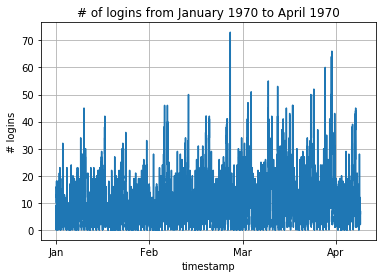

In [42]:
import matplotlib.pyplot as plt
plt.plot(df1.index, df1['count'])
plt.xlabel('timestamp')
plt.ylabel('# logins')
plt.title('# of logins from January 1970 to April 1970')
ax = plt.gca() # grab the current axis
ax.set_xticks([1,3000,6000,9000]) # choose which x locations to have ticks
ax.set_xticklabels(['Jan','Feb','Mar','Apr']) 
plt.grid(True)
plt.show()

# 2-1) Time or Rides drivers spent or complete in each city.
# 2-2) A) A/B Testing. B) I would create two groups, one with reimbursed toll costs and one without. I would compare the two groups to see if time spend and rides given to both cities is signifcantly different using a t-test. C) If the results showed an improvement in drivers availability to both cities, I would recommend reimbursing toll costs. I would likely run a cost/benefit analysis to see if the company could afford reimbursing all of the toll costs. A cap may be necessary.


# 3) When looking at the sample data for customers that are still active after 6 months, the variable that sets the data apart is driver rating. The min driver rating for customers active after 6 months is 4.2, compared to 1.0 for the entire sample. Similarly, the mean driver rating is 4.75, compared to a mean of 4.6 for the entire population. Currently there are 33,475 records out of the 41,878 total with a driver rating above 4.2. If we can keep driver ratings up many of these customers will stay engaged with the product after 6 months from the signup date. 

In [45]:
json_data=open('/Users/ryanpurcell/Desktop/ultimate_challenge/ultimate_data_challenge.json').read()
data = json.loads(json_data)

In [46]:
df=pd.DataFrame(data)
#last trip date - signup date is greater than 60 days
#trips in first 30 days is greater than 0
#model looking at types of people likely to stay
#avg customer rating
#avg surge multiplier - higher cost
#city
#df['last_trip_date']-df['signup_date']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [47]:
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [48]:
df['variance']=df['last_trip_date'] - df['signup_date']

In [50]:
df['variance'].max()

Timedelta('181 days 00:00:00')

In [52]:
import datetime
filter1 = df['variance']>datetime.timedelta(days=180)

In [65]:
#13 records where variance > 180 days
#Avg driver rating of records with variance > 180 days is 4.75
#Min driver rating of records with variance > 180 days is 4.2
df[filter1]['avg_rating_of_driver'].min()
#df[filter1].count()
#df[filter1]

4.2000000000000002

In [69]:
#Min driver rating for entire population
df['avg_rating_of_driver'].min()

1.0

In [55]:
df.sort_values('variance',ascending=False)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,variance
47127,5.18,4.7,5.0,1.02,Winterfell,2014-07-01,iPhone,2014-01-01,2.9,5,False,55.9,181 days
1636,3.14,4.7,5.0,1.09,Winterfell,2014-07-01,Android,2014-01-01,7.1,2,False,71.4,181 days
34464,3.00,4.7,4.7,1.13,King's Landing,2014-07-01,iPhone,2014-01-01,33.3,1,False,38.1,181 days
8266,2.84,4.9,4.9,1.12,King's Landing,2014-07-01,iPhone,2014-01-01,15.8,2,False,57.9,181 days
18679,3.94,4.8,4.6,1.03,King's Landing,2014-07-01,iPhone,2014-01-01,7.7,2,False,69.2,181 days
5706,3.54,4.5,4.4,1.00,Winterfell,2014-07-01,iPhone,2014-01-01,0.0,2,False,66.7,181 days
39207,5.76,4.5,4.2,1.00,Winterfell,2014-07-01,iPhone,2014-01-01,0.0,0,False,52.6,181 days
33488,2.91,4.9,4.9,1.05,King's Landing,2014-07-01,iPhone,2014-01-01,6.8,54,True,70.7,181 days
34959,2.27,5.0,4.8,1.17,Winterfell,2014-07-01,iPhone,2014-01-01,33.3,0,False,66.7,181 days
23214,4.05,4.7,NaN,1.00,Winterfell,2014-07-01,iPhone,2014-01-01,0.0,1,False,50.0,181 days


In [ ]:
#new df is more than certain number of days of engagement. Compare that group to old group.

In [56]:
filter2 = df['avg_rating_of_driver']>=4.2

In [57]:
df[filter2]['avg_rating_of_driver'].count()

33475

In [61]:
df['avg_rating_of_driver'].count()

41878

In [62]:
import datetime
filter3 = df['variance']<datetime.timedelta(days=180)

In [67]:
df[filter3]['avg_rating_of_driver'].mean()

4.601540817302907